# Лабораторная работа № 3

## Задания

![tasks](./tasks.png)

Время, когда луч пересекает прямую y = 0

$$
T(p) = 2\int_0^{n^{-1}(p)} \frac{n^2(y)}{\sqrt{n^2(y)-p^2}}dy
$$

Координата x точки пересечения луча прямой y = 0. Это решение прямой задачи: n(y) известно, нужно найти X(p). $p_0$ - это некоторое произвольное положительное число

$$
X(p) = 2p\int_0^{n^{-1}(p)} \frac{dy}{\sqrt{n^2(y)-p^2}}, p ∈ [p_0, n(0)]
$$

Восстановленная функция $n^{-1}(r)$. Это решение обратной задачи: X(p) известно, нужно найти n(y). n(0) должно быть известно

$$
n^{-1}(r) = \frac{1}{\pi} \int_r^{n(0)} \frac{X(p)dp}{\sqrt{p^2-r^2}}, r ∈ [p_0, n(0)]
$$

## Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Реализация

### Замены

Интегралы T(p) и X(p) являются несобственными, потому для численного решения сначала нужно сделать замену

$$
y = n^{-1}(p) - t^2
$$

$$
dy = -2tdt
$$

Тогда

$$
T(p) = -4\int_{\sqrt{n^{-1}(p)}}^0 \frac{n^2(n^{-1}(p) - t^2)t}{\sqrt{n^2(n^{-1}(p) - t^2)-p^2}}dt
$$

$$
X(p) = -4p\int_{\sqrt{n^{-1}(p)}}^0 \frac{t}{\sqrt{n^2(n^{-1}(p) - t^2)-p^2}}dt
$$

То же самое и с интегралом для $n^{-1}(r)$. Делаем замену

$$
p = r + u^2
$$

$$
dp = 2udu
$$

И тогда

$$
n^{-1}(r) = \frac{2}{\pi} \int_0^{\sqrt{n(0)-r}} \frac{X(r+u^2)u}{\sqrt{(r+u^2)^2-r^2}}du
$$

Все интегралы считаются численно через метод прямоугольников

### Начальные параметры

In [2]:
n0 = 2
p0 = 0.5

steps = 300  # сколько значений рассматриваем

def n(y):
    return n0 * np.exp(-y)

def n_inverse(p):
    return -np.log(p / n0)

### Функция T(p)

In [3]:
def T(p):
    y_min, y_max = 0, n_inverse(p)
    dy = (y_max-y_min)/steps

    result = 0

    for i in range(steps-1):  # при последнем шаге всегда будет 0, так что не считаем его
        y = y_min + i*dy
        t = np.sqrt(n_inverse(p) - y)
        dt = dy / (-2*t)
        n2 = n(n_inverse(p) - t**2)**2
        
        result += dt * n2 * t / np.sqrt(n2 - p**2)

    return -4*result

### Координаты луча

Здесь смотрим на подынтегральное выражение для X(p) и просто считаем интегралы, чтобы найти x

In [4]:
def ray(p):
    y_min, y_max = 0, n_inverse(p)
    dy = (y_max-y_min)/steps
    
    x = np.zeros(steps)
    y = np.linspace(y_min, y_max, steps)

    for i in range(1, steps-1):  # при последнем шаге всегда будет 0, так что не считаем его
        t = np.sqrt(n_inverse(p) - y[i])
        dt = dy / (-2*t)
        n2 = n(n_inverse(p) - t**2)**2
        
        x[i] = x[i-1] - dt * 4*p * t / np.sqrt(n2 - p**2)

    x[-1] = x[-2]  # последний интеграл будет 0

    return x, y

### Отрисовка лучей

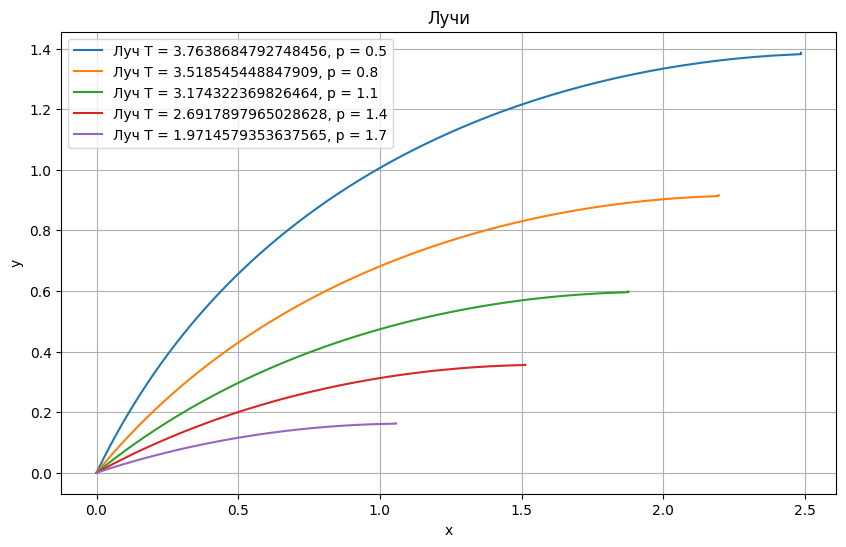

In [5]:
plt.figure(figsize=(10, 6))

p_values = np.linspace(p0, n0, 5, endpoint=False)

for p in p_values:
    x, y = ray(p)

    plt.plot(x, y, label=f"Луч T = {T(p)}, p = {p}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Лучи")
plt.legend()
plt.grid()
plt.show()

### Численное решение прямой задачи для X(p)

In [6]:
def X(p):
    y_min, y_max = 0, n_inverse(p)
    dy = (y_max-y_min)/steps

    result = 0

    for i in range(steps-1):  # при последнем шаге всегда будет 0, так что не считаем его
        y = y_min + i*dy
        t = np.sqrt(n_inverse(p) - y)
        dt = dy / (-2*t)
        n2 = n(n_inverse(p) - t**2)**2
        
        result += dt * t / np.sqrt(n2 - p**2)

    return -4*p*result

### Отрисовка X(p)

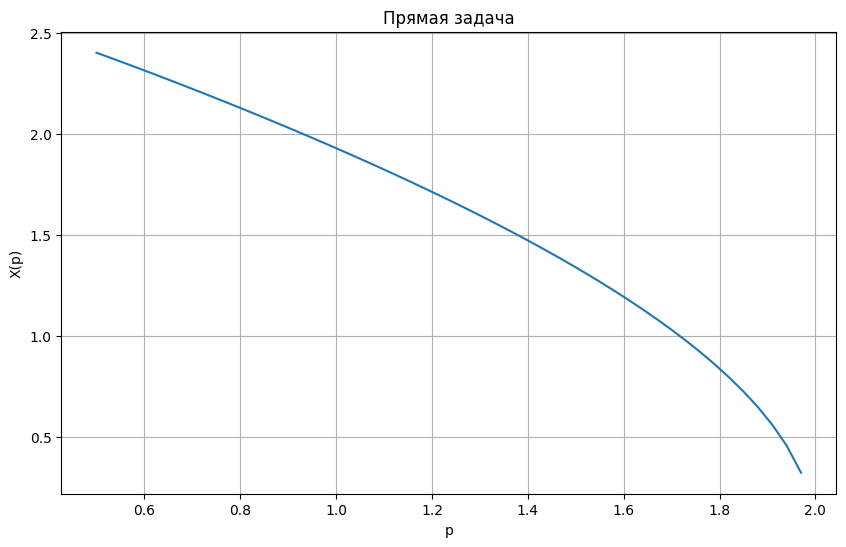

In [7]:
plt.figure(figsize=(10, 6))

p = np.linspace(p0, n0, 50, endpoint=False)

plt.plot(p, X(p))

plt.xlabel("p")
plt.ylabel("X(p)")
plt.title("Прямая задача")
plt.grid()
plt.show()

### Численное решение обратной задачи

In [8]:
def n_inverse_reconstructed(r):
    p_min, p_max = r, n0
    dp = (p_max-p_min)/steps
    
    result = 0

    for i in range(1, steps):  # при первом шаге всегда будет 0, так что не считаем его
        p = p_min + i*dp
        u = np.sqrt(p - r)
        du = dp / (2*u)
        
        result += 2 / np.pi * X(r + u**2) * u * du / np.sqrt((r + u**2)**2 - r**2)

    return result

### Сравнение исходной функции и восстановленной

Помним о том, что восстановлена была обратная функция, потому для сравнения сначала берём несколько значений p, через них находим значения y, подставив в обратную функцию, а затем найдём значения p для этих y через изначальную функцию

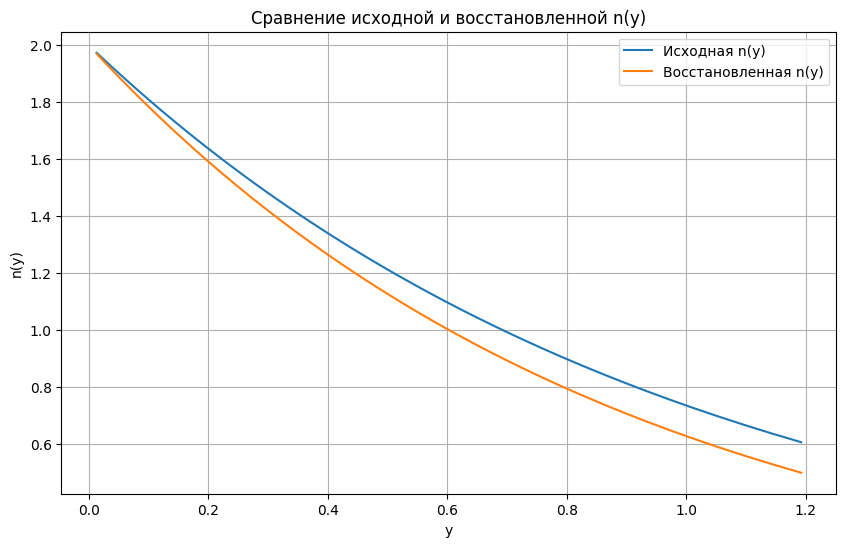

In [9]:
plt.figure(figsize=(10, 6))

p_reconstructed = np.linspace(p0, n0, 50, endpoint=False)
y_values = [n_inverse_reconstructed(r) for r in p_reconstructed]
p_true = [n(y) for y in y_values]

plt.plot(y_values, p_true, label="Исходная n(y)")
plt.plot(y_values, p_reconstructed, label="Восстановленная n(y)")
plt.xlabel("y")
plt.ylabel("n(y)")
plt.title("Сравнение исходной и восстановленной n(y)")
plt.legend()
plt.grid()
plt.show()